In [2]:
import paddle
import numpy as np

paddle.__version__

'2.5.2'

## Tensor的概念

- 飞桨使用张量（Tensor） 来表示神经网络中传递的数据，Tensor 可以理解为多维数组，类似于ndarray
- Tensor 除了支持运行在 CPU 上，还支持运行在 GPU 及各种 AI 芯片上，以实现计算加速
- 飞桨基于 Tensor，实现了深度学习所必须的反向传播功能和多种多样的组网算子，从而可更快捷地实现深度学习组网与训练等功能
- 在飞桨框架中，神经网络的输入、输出数据，以及网络中的参数均采用 Tensor 数据结构

## Tensor的创建

飞浆支持以多种形式创建Tensor

- 指定数据创建
- 指定形状创建
- 指定区间创建
- 指定图像、文本数据创建
- 自动创建Tensor的功能介绍
- Tensor与Numpy数组相互转换

Tensor 必须形如矩形，即在任何一个维度上，元素的数量必须相等，否则会抛出异常

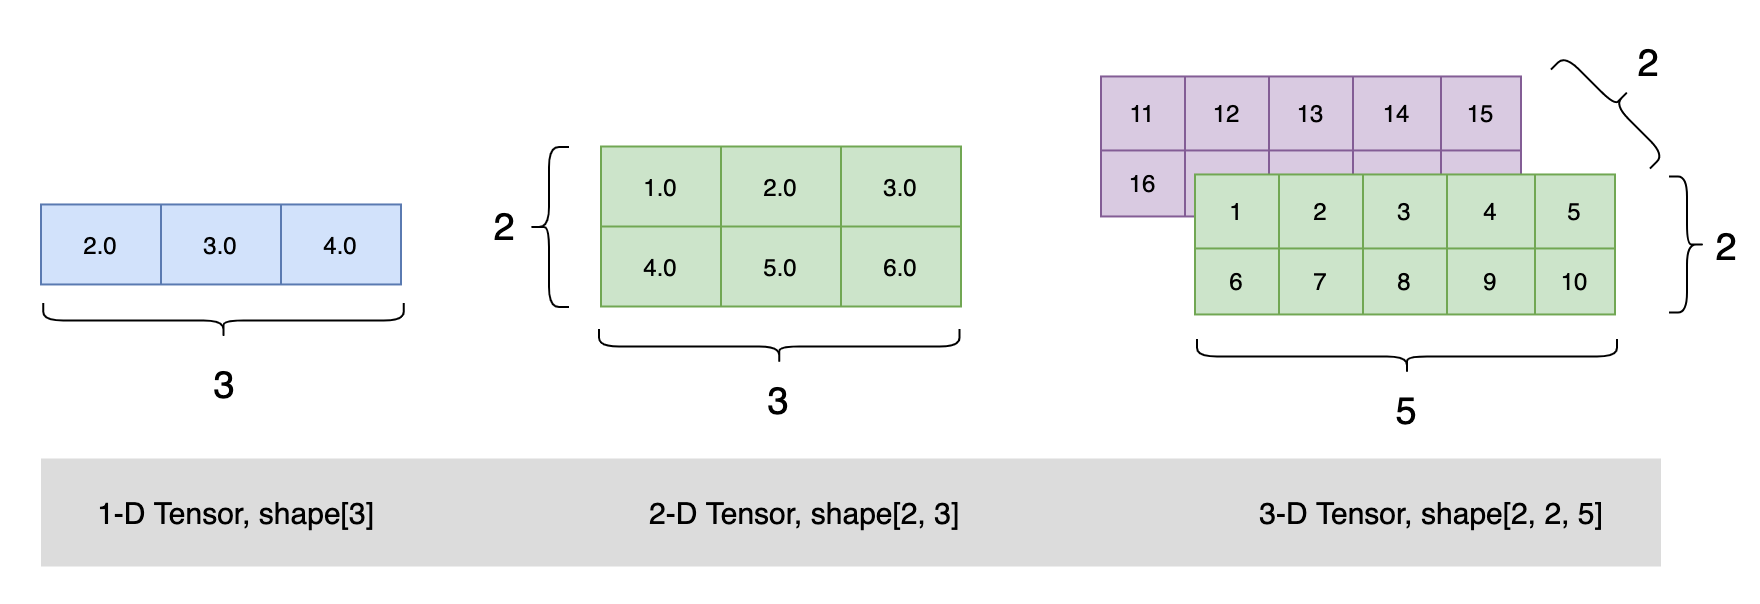

In [2]:
# 指定数据创建
# tensor与list和ndarray的互相转换
list1 = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

d1 = np.array(list1)

# t1 = paddle.to_tensor(list1)
t1 = paddle.to_tensor(d1)

t1

Tensor(shape=[3, 3], dtype=int64, place=Place(cpu), stop_gradient=True,
       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [5]:
# 指定形状创建
paddle.zeros([3, 2])  # 创建数据全为 0，形状为 [m, n] 的 Tensor
paddle.ones([3, 2])  # 创建数据全为 1，形状为 [m, n] 的 Tensor
paddle.full([3, 2], 10)  # 创建数据全为 10，形状为 [m, n] 的 Tensor

Tensor(shape=[3, 2], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[10., 10.],
        [10., 10.],
        [10., 10.]])

In [8]:
# 指定区间创建
paddle.arange(start=1, end=10, step=2)  # 创建以步长 step 均匀分隔区间[start, end)的 Tensor
paddle.linspace(start=1, stop=10, num=5)  # 创建以元素个数 num 均匀分隔区间[start, stop)的 Tensor

Tensor(shape=[5], dtype=float32, place=Place(cpu), stop_gradient=True,
       [1.        , 3.25000000, 5.50000000, 7.75000000, 10.       ])

除了以上指定数据、形状、区间创建 Tensor 的方法，飞桨还支持如下类似的创建方式，如:

- 创建一个空 Tensor，即根据 shape 和 dtype 创建尚未初始化元素值的 Tensor，可通过 paddle.empty 实现
- 创建一个与其他 Tensor 具有相同 shape 与 dtype 的 Tensor，可通过 paddle.ones_like 、 paddle.zeros_like 、 paddle.full_like 、paddle.empty_like 实现
- 拷贝并创建一个与其他 Tensor 完全相同的 Tensor，可通过 paddle.clone 实现
- 创建一个满足特定分布的 Tensor，如 paddle.rand, paddle.randn , paddle.randint 等
- 通过设置随机种子创建 Tensor，可每次生成相同元素值的随机数 Tensor，可通过 paddle.seed 和 paddle.rand 组合实现

In [11]:
"""指定图像、文本创建

- 在常见深度学习任务中，数据样本可能是图片（image）、文本（text）、语音（audio）等多种类型，
    在送入神经网络训练或推理前，这些数据和对应的标签均需要创建为 Tensor。
- 对于图像场景，可使用 paddle.vision.transforms.ToTensor 直接将 PIL.Image 格式的数据转为 Tensor，
    使用 paddle.to_tensor 将图像的标签（Label，通常是Python 或 Numpy 格式的数据）转为 Tensor。
- 对于文本场景，需将文本数据解码为数字后，再通过 paddle.to_tensor 转为 Tensor。
    不同文本任务标签形式不一样，有的任务标签也是文本，有的则是数字，均需最终通过 paddle.to_tensor 转为 Tensor。
- 飞桨数据加载的 paddle.io.DataLoader API 能够将原始 paddle.io.Dataset 定义的数据自动转换为 Tensor。

"""

# 将随机生成的图片转换为Tensor格式
from PIL import bImage
import paddle.vision.transforms as T
import paddle.vision.transforms.functional as F

fake_img = Image.fromarray((np.random.rand(224, 224, 3) * 255).astype(np.uint8))  # 创建随机图片
transform = T.ToTensor()
img_tensor = transform(fake_img)  # 使用paddle.vision.transforms.ToTensor直接将PIL.Image格式的数据转换为Tensor

img_tensor

Tensor(shape=[3, 224, 224], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[[0.81960791, 0.34901962, 0.81568635, ..., 0.38431376,
          0.20784315, 0.33725491],
         [0.60000002, 0.89411771, 0.97647065, ..., 0.17254902,
          0.98823535, 0.19215688],
         [0.26666668, 0.01960784, 0.85882360, ..., 0.86666673,
          0.14509805, 0.20392159],
         ...,
         [0.09411766, 0.54901963, 0.74117649, ..., 0.89803928,
          0.20784315, 0.85098046],
         [0.28627452, 0.12156864, 0.33725491, ..., 0.49803925,
          0.01960784, 0.22352943],
         [0.90588242, 0.51372552, 0.12549020, ..., 0.64705884,
          0.52941179, 0.68627453]],

        [[0.78431380, 0.54117650, 0.60000002, ..., 0.55294120,
          0.15686275, 0.40000004],
         [0.70588237, 0.44313729, 0.92941183, ..., 0.40784317,
          0.15686275, 0.98823535],
         [0.34901962, 0.07450981, 0.13333334, ..., 0.28235295,
          0.47058827, 0.71372551],
         ...,
       

飞桨框架中有一些 API 封装了 Tensor 创建的操作，从而无需手动创建，如：

- paddle.io.DataLoader 能够基于原始 Dataset，返回读取 Dataset 数据的迭代器，迭代器返回的数据中的每个元素都是一个 Tensor
- 一些高层 API，如 paddle.Model.fit 、paddle.Model.predict ，如果传入的数据不是 Tensor，会自动转为 Tensor 再进行模型训练或推理

paddle.Model.fit、paddle.Model.predict 等高层 API 支持传入 Dataset 或 DataLoader

- 如果传入的是 Dataset，那么会用 DataLoader 封装转为 Tensor 数据
- 如果传入的是 DataLoader，则直接从 DataLoader 迭代读取 Tensor 数据送入模型训练或推理。因此即使没有写将数据转为 Tensor 的代码，也能正常执行，提升了编程效率和容错性

## Tensor的属性

### Tensor的形状

形状是 Tensor 的一个重要的基础属性，可以通过 Tensor.shape 查看一个 Tensor 的形状

- shape：描述了 Tensor 每个维度上元素的数量
- ndim：Tensor 的维度数量，例如向量的维度为 1，矩阵的维度为 2，Tensor 可以有任意数量的维度
- axis 或者 dimension：Tensor 的轴，即某个特定的维度
- size：Tensor 中全部元素的个数

In [4]:
# 创建1个4维Tensor

ndim_4_tensor = paddle.ones([2, 3, 4, 5])

ndim_4_tensor

Tensor(shape=[2, 3, 4, 5], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]],

         [[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]],

         [[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]]],


        [[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]],

         [[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]],

         [[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]]]])

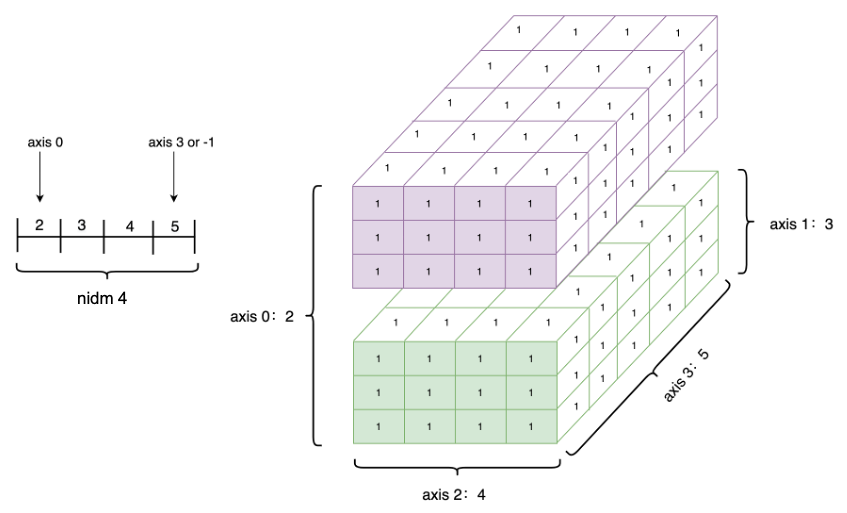

In [9]:
print('形状：', ndim_4_tensor.shape)
print('维度：', ndim_4_tensor.ndim)
print('元素个数：', ndim_4_tensor.size)
print('数据类型：', ndim_4_tensor.dtype)

print('Elements number along axis 0 of Tensor：', ndim_4_tensor.shape[0])
print('Elements number along the last axis of Tensor：', ndim_4_tensor.shape[-1])

形状： [2, 3, 4, 5]
维度： 4
元素个数： 120
数据类型： paddle.float32
Elements number along axis 0 of Tensor： 2
Elements number along the last axis of Tensor： 5


重新设置 Tensor 的 shape 在深度学习任务中比较常见，如一些计算类 API 会对输入数据有特定的形状要求，这时可通过 paddle.reshape 接口来改变 Tensor 的 shape，但并不改变 Tensor 的 size 和其中的元素数据。

在指定新的 shape 时存在一些技巧：

- -1 表示这个维度的值是从 Tensor 的元素总数和剩余维度自动推断出来的，因此有且只有一个维度可以被设置为 -1
- 0 表示该维度的元素数量与原值相同，因此 shape 中 0 的索引值必须小于 Tensor 的维度（索引值从 0 开始计，如第 1 维的索引值是 0，第二维的索引值是 1）

In [10]:
list1 = [i for i in range(1, 10)]

tensor1 = paddle.to_tensor(list1, dtype='float32')

tensor1

Tensor(shape=[9], dtype=float32, place=Place(cpu), stop_gradient=True,
       [1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [12]:
# 使用-1自动计算得出第二维的元素个数为 9 / 3 = 3
tensor2 = paddle.reshape(tensor1, [3, -1])

tensor2

Tensor(shape=[3, 3], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [14]:
# 使用reshape[-1]将Tensor按其在计算机上的内存分布展平为一维

paddle.reshape(tensor2, [-1]).numpy()

array([1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

除了 paddle.reshape 可重置 Tensor 的形状，还可通过如下方法改变 shape

- paddle.squeeze，可实现 Tensor 的降维操作，即把 Tensor 中尺寸为 1 的维度删除
- paddle.unsqueeze，可实现 Tensor 的升维操作，即向 Tensor 中某个位置插入尺寸为 1 的维度
- paddle.flatten，将 Tensor 的数据在指定的连续维度上展平
- paddle.transpose，对 Tensor 的数据进行重排

### Tensor的数据类型

Tensor支持的数据类型包括：bool、float16、float32、float64、uint8、int8、int16、int32、int64、complex64、complex128

- 同一 Tensor 中所有元素的数据类型均相同，如果通过Python序列创建Tensor时未指定数据类型，则整数类型默认为int64，浮点数类型默认为float32
- 通过 Numpy 数组或其他 Tensor 创建的 Tensor，则与其原来的数据类型保持相同
- 飞桨框架提供了paddle.cast 接口来改变 Tensor 的 dtype

In [17]:
float32_tensor = paddle.to_tensor(1.0)

float64_tensor = paddle.cast(float32_tensor, dtype='float64')

int64_tensor = paddle.cast(float32_tensor, dtype='int64')

print(float64_tensor.dtype)
print(int64_tensor.dtype)

paddle.float64
paddle.int64


### Tensor的设备位置

初始化 Tensor 时可以通过 Tensor.place 来指定其分配的设备位置，可支持的设备位置有：CPU、GPU、固定内存、XPU（Baidu Kunlun）、NPU（Huawei）、MLU（寒武纪）、IPU（Graphcore）等

- 当未指定 place 时，Tensor 默认设备位置和安装的飞桨框架版本一致
- 使用 paddle.device.set_device 可设置全局默认的设备位置。Tensor.place 的指定值优先级高于全局默认值

In [1]:
# gpu_tensor = paddle.to_tensor([1], place=paddle.CUDAPlace(0))

### Tensor的名称

Tensor 的名称是其唯一的标识符，为 Python 字符串类型，查看一个 Tensor 的名称可以通过 Tensor.name 属性。

默认地，在每个 Tensor 创建时，会自定义一个独一无二的名称。

In [3]:
print(paddle.to_tensor(1).name)

generated_tensor_0


### Tensor的stop_gradient属性

- stop_gradient 表示是否停止计算梯度，默认值为 True，表示停止计算梯度，梯度不再回传。
- 在设计神经网络时，如不需要对某些参数进行训练更新，可以将参数的 stop_gradient 设置为 True

In [5]:
t = paddle.to_tensor([1])

# 直接设置stop_gradient的值
t.stop_gradient = False

t

Tensor(shape=[1], dtype=int64, place=Place(cpu), stop_gradient=False,
       [1])